In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load Data

In [2]:
df = pd.read_csv("F:\Portofolio\Olist-Ml\dataset\processed\state_cluster_data.csv")

In [3]:
print(df)

      seller_state                           product_category_name  \
0               MG                                moveis_decoracao   
1               PR                                       telefonia   
2               PR                                    beleza_saude   
3               SP                                           bebes   
4               AC                                 livros_tecnicos   
...            ...                                             ...   
45728           SP                           utilidades_domesticas   
45729           SP                              relogios_presentes   
45730           SP                                      perfumaria   
45731           SP                                   esporte_lazer   
45732           SP  moveis_cozinha_area_de_servico_jantar_e_jardim   

       total_orders  total_items  total_sales  avg_order_value  
0          0.693147     1.098612     4.921658         4.235772  
1          0.693147     0.693

In [4]:
df[['total_orders', 'total_items', 'total_sales', 'avg_order_value']].corr()

,total_orders,total_items,total_sales,avg_order_value
total_orders,1.000000,0.951647,0.632066,-0.004377
total_items,0.951647,1.000000,0.639636,-0.042167
total_sales,0.632066,0.639636,1.000000,0.737644
avg_order_value,-0.004377,-0.042167,0.737644,1.000000


### StandardScaller

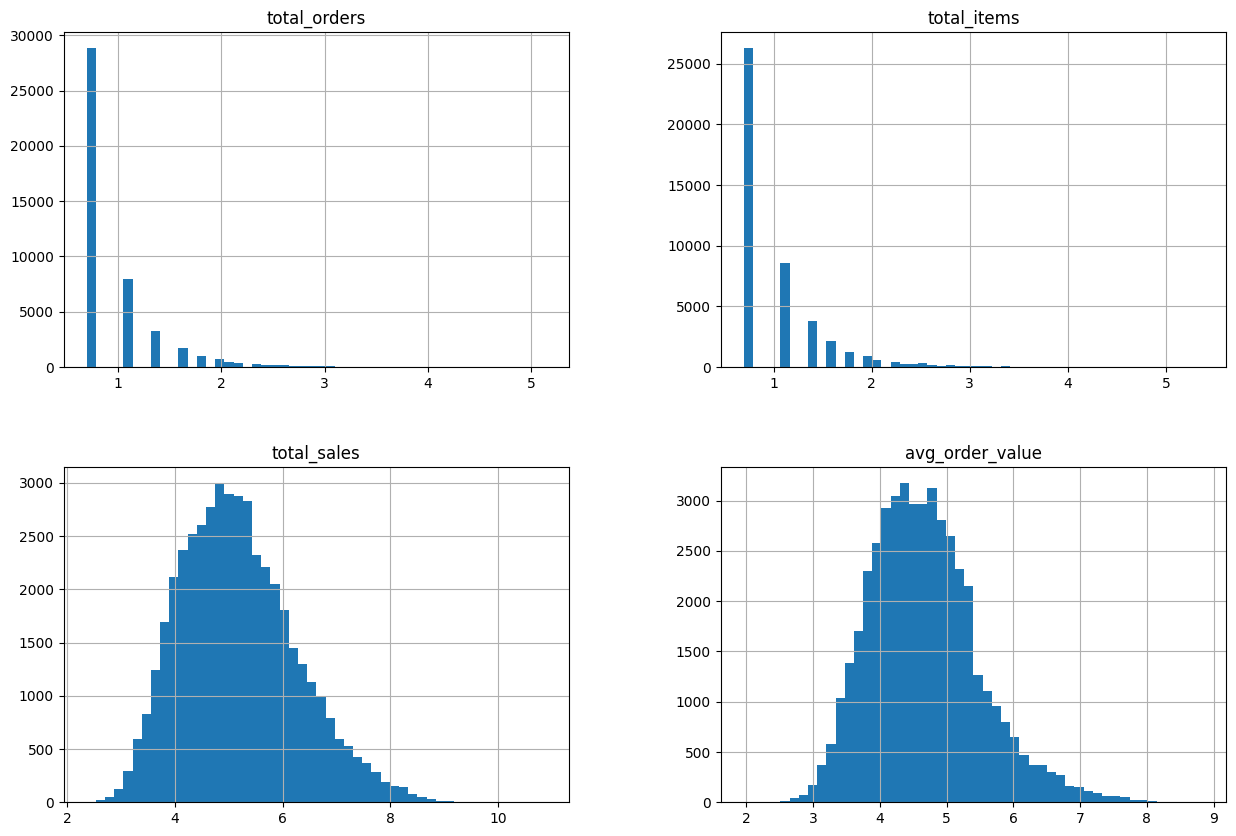

In [5]:
# Memastikan bahwa distribusi data sudah di perbaiki agar merata dan tidak terlalu berat di outlier
df[['total_orders', 'total_items', 'total_sales', 'avg_order_value']].hist(bins=50, figsize=(15, 10))
plt.show()

In [6]:
# Implement StandardScaller
ss = StandardScaler()

In [7]:
# Selected Features
df[['total_orders_ss', 'total_items_ss', 'total_sales_ss', 'avg_order_value_ss']] = ss.fit_transform(df[['total_orders', 'total_items',
                                                                                                        'total_sales', 'avg_order_value']])

In [8]:
df

,seller_state,product_category_name,total_orders,total_items,total_sales,avg_order_value,total_orders_ss,total_items_ss,total_sales_ss,avg_order_value_ss
0,MG,moveis_decoracao,0.693147,1.098612,4.921658,4.235772,-0.59244,0.116126,-0.238274,-0.522887
1,PR,telefonia,0.693147,0.693147,4.331523,4.331523,-0.59244,-0.653619,-0.788414,-0.406352
2,PR,beleza_saude,0.693147,1.386294,4.973003,3.888140,-0.59244,0.662269,-0.190410,-0.945976
3,SP,bebes,0.693147,0.693147,4.703567,4.703567,-0.59244,-0.653619,-0.441585,0.046449
4,AC,livros_tecnicos,0.693147,0.693147,5.706579,5.706579,-0.59244,-0.653619,0.493448,1.267177
...,...,...,...,...,...,...,...,...,...,...
45728,SP,utilidades_domesticas,0.693147,0.693147,4.279163,4.279163,-0.59244,-0.653619,-0.837225,-0.470077
45729,SP,relogios_presentes,0.693147,0.693147,5.188781,5.188781,-0.59244,-0.653619,0.010744,0.636986
45730,SP,perfumaria,0.693147,0.693147,4.484358,4.484358,-0.59244,-0.653619,-0.645937,-0.220342
45731,SP,esporte_lazer,0.693147,1.386294,4.306360,3.234355,-0.59244,0.662269,-0.811871,-1.741673


### Identifikasi Optimum Number Cluster - Elbow Method

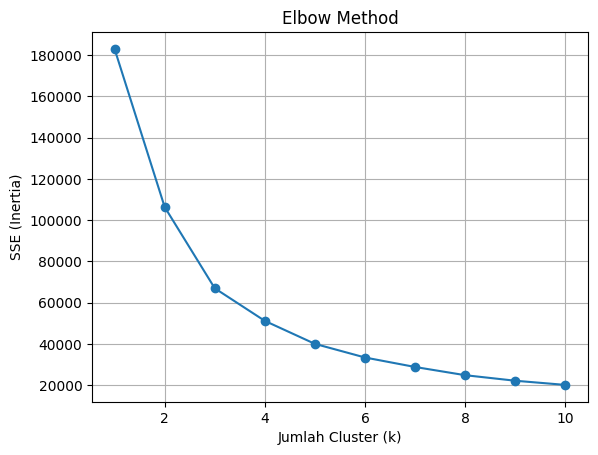

In [9]:
# Pakai feature hasil log + SS
X = df[['total_orders_ss', 'total_items_ss', 'total_sales_ss', 'avg_order_value_ss']]

sse = []  # list untuk simpan nilai inertia

# coba jumlah cluster dari 1 sampai 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=20)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot hasilnya
plt.plot(range(1, 11), sse, 'o-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4)

In [22]:
kmeans.fit(df[['total_orders_ss', 'total_items_ss', 'total_sales_ss', 'avg_order_value_ss']])

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [12]:
df['kmeans_3'] = kmeans.labels_

In [23]:
df['kmeans_4'] = kmeans.labels_

In [28]:
df.head(10)

,seller_state,product_category_name,total_orders,total_items,total_sales,avg_order_value,total_orders_ss,total_items_ss,total_sales_ss,avg_order_value_ss,kmeans_3,kmeans_4
0,MG,moveis_decoracao,0.693147,1.098612,4.921658,4.235772,-0.592440,0.116126,-0.238274,-0.522887,0,2
1,PR,telefonia,0.693147,0.693147,4.331523,4.331523,-0.592440,-0.653619,-0.788414,-0.406352,0,2
2,PR,beleza_saude,0.693147,1.386294,4.973003,3.888140,-0.592440,0.662269,-0.190410,-0.945976,0,2
3,SP,bebes,0.693147,0.693147,4.703567,4.703567,-0.592440,-0.653619,-0.441585,0.046449,0,2
4,AC,livros_tecnicos,0.693147,0.693147,5.706579,5.706579,-0.592440,-0.653619,0.493448,1.267177,2,0
5,BA,informatica_acessorios,0.693147,0.693147,5.180940,5.180940,-0.592440,-0.653619,0.003435,0.627443,2,0
6,CE,cool_stuff,0.693147,0.693147,4.513384,4.513384,-0.592440,-0.653619,-0.618878,-0.185016,0,2
7,DF,cool_stuff,0.693147,0.693147,4.170070,4.170070,-0.592440,-0.653619,-0.938924,-0.602850,0,2
8,DF,ferramentas_jardim,0.693147,0.693147,6.040398,6.040398,-0.592440,-0.653619,0.804642,1.673455,2,0
9,DF,market_place,0.693147,0.693147,4.600660,4.600660,-0.592440,-0.653619,-0.537517,-0.078795,0,2


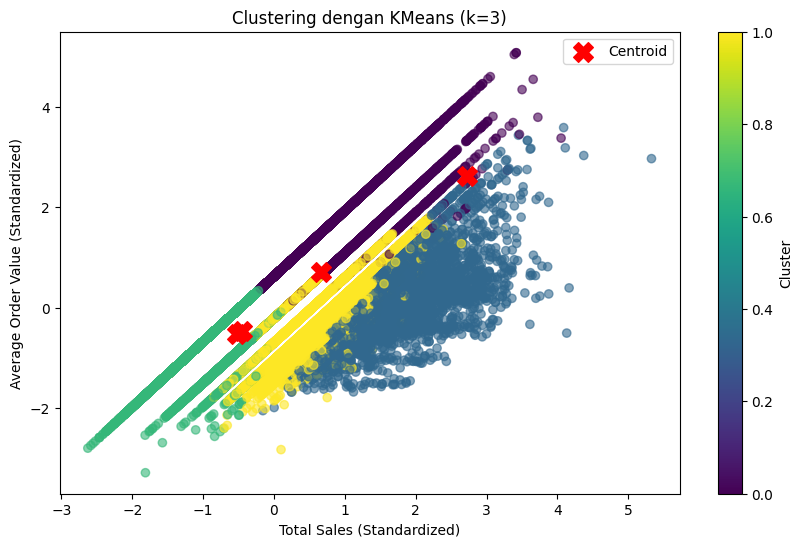

In [25]:
# Plot scatter
plt.figure(figsize=(10,6))
plt.scatter(
    x=df['total_sales_ss'], 
    y=df['avg_order_value_ss'], 
    c=df['kmeans_4'], 
    cmap='viridis', 
    alpha=0.6
)

# Tambahkan centroid
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='X', s=200, label='Centroid'
)

plt.xlabel("Total Sales (Standardized)")
plt.ylabel("Average Order Value (Standardized)")
plt.title("Clustering dengan KMeans (k=3)")
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [30]:
import pandas as pd

# Ringkasan jumlah state per cluster
state_summary = (
    df.groupby(['kmeans_3', 'seller_state'])
      .size()
      .reset_index(name='count')
      .sort_values(['kmeans_3','count'], ascending=[True, False])
)

# Ambil top 5 state tiap cluster
top_states = state_summary.groupby('kmeans_3').head(5)

# Ringkasan kategori produk per cluster
product_summary = (
    df.groupby(['kmeans_3', 'product_category_name'])
      .size()
      .reset_index(name='count')
      .sort_values(['kmeans_3','count'], ascending=[True, False])
)

# Ambil top 5 kategori produk tiap cluster
top_products = product_summary.groupby('kmeans_3').head(5)

# Ringkasan metrik sales per cluster
cluster_metrics = (
    df.groupby('kmeans_3')
      .agg(
          total_sales_sum=('total_sales', 'sum'),
          avg_sales=('total_sales', 'mean'),
          avg_order_value=('avg_order_value', 'mean'),
          n_records=('kmeans_3', 'count')
      )
      .reset_index()
)

# Output
print("=== Top 5 State per Cluster ===")
print(top_states)

print("\n=== Top 5 Produk per Cluster ===")
print(top_products)

print("\n=== Ringkasan Sales per Cluster ===")
print(cluster_metrics)


=== Top 5 State per Cluster ===
    kmeans_3 seller_state  count
21         0           SP  15870
7          0           MG   2049
14         0           PR   1603
19         0           SC   1092
15         0           RJ    991
38         1           SP   5784
28         1           MG    721
33         1           PR    638
34         1           RJ    365
37         1           SC    267
61         2           SP   8328
54         2           PR   1762
47         2           MG   1510
59         2           SC    944
55         2           RJ    773

=== Top 5 Produk per Cluster ===
     kmeans_3   product_category_name  count
33          0           esporte_lazer   2230
72          0   utilidades_domesticas   1994
12          0            beleza_saude   1931
55          0        moveis_decoracao   1711
45          0  informatica_acessorios   1192
87          1         cama_mesa_banho   1026
85          1            beleza_saude    726
103         1           esporte_lazer    708
1

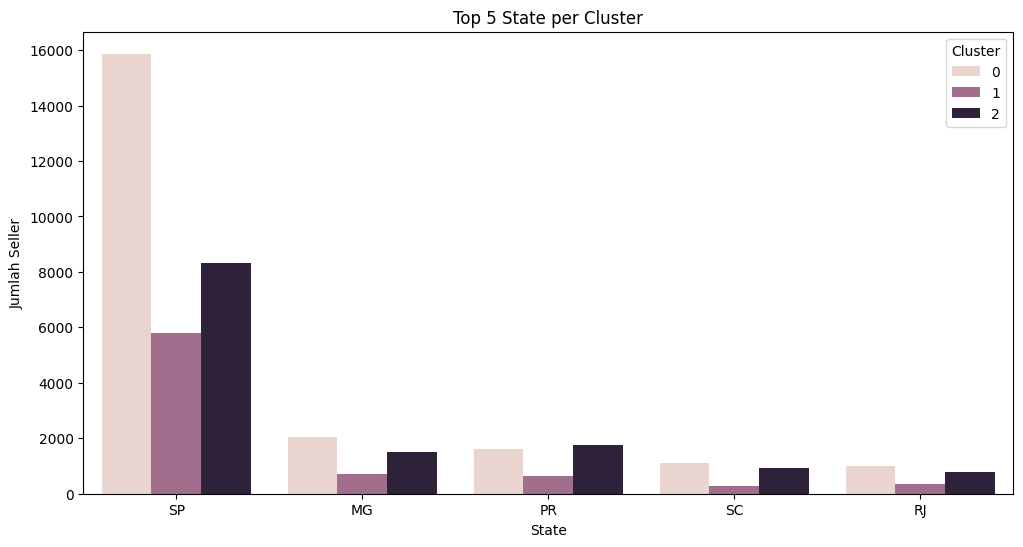

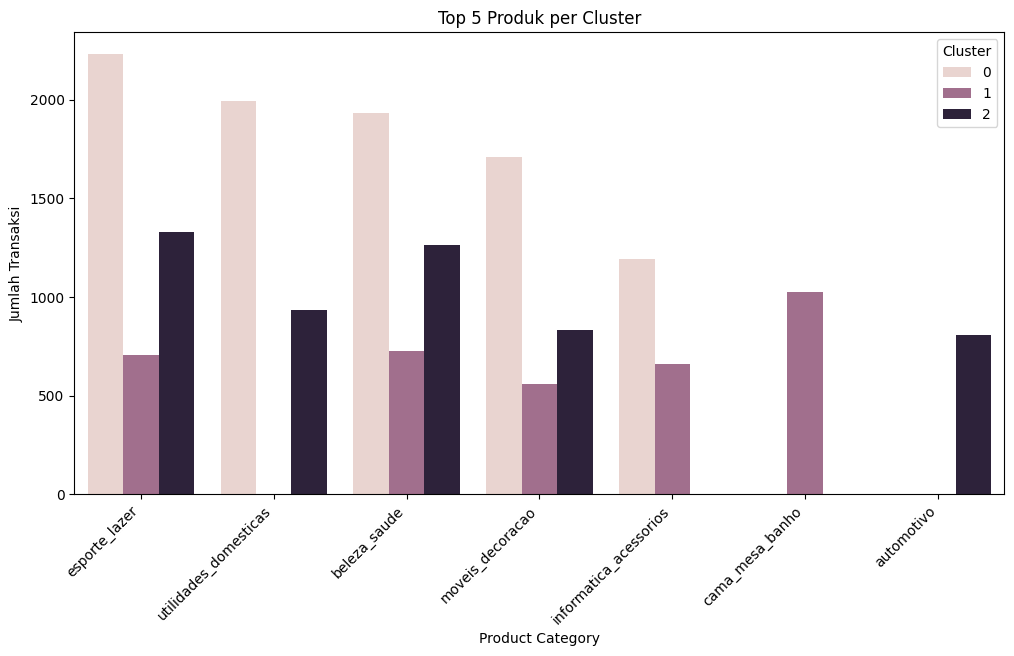

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12064\2630315125.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12064\2630315125.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


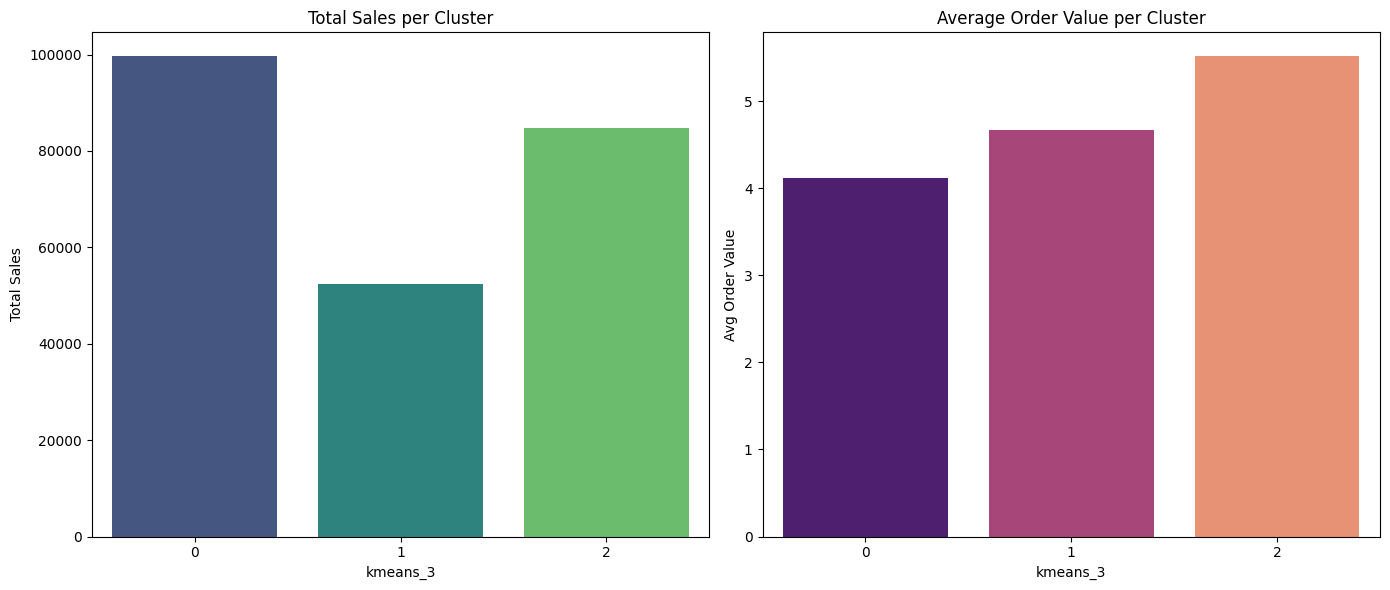

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Top 5 State per Cluster ===
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_states,
    x="seller_state", y="count", hue="kmeans_3"
)
plt.title("Top 5 State per Cluster")
plt.xlabel("State")
plt.ylabel("Jumlah Seller")
plt.legend(title="Cluster")
plt.show()

# === 2. Top 5 Produk per Cluster ===
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_products,
    x="product_category_name", y="count", hue="kmeans_3"
)
plt.title("Top 5 Produk per Cluster")
plt.xlabel("Product Category")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.show()

# === 3. Ringkasan Sales per Cluster ===
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(
    data=cluster_metrics,
    x="kmeans_3", y="total_sales_sum", ax=axes[0], palette="viridis"
)
axes[0].set_title("Total Sales per Cluster")
axes[0].set_xlabel("kmeans_3")
axes[0].set_ylabel("Total Sales")

sns.barplot(
    data=cluster_metrics,
    x="kmeans_3", y="avg_order_value", ax=axes[1], palette="magma"
)
axes[1].set_title("Average Order Value per Cluster")
axes[1].set_xlabel("kmeans_3")
axes[1].set_ylabel("Avg Order Value")

plt.tight_layout()
plt.show()
